## Setup
Importing libraries:<br>
Numpy <br>
Matplotlib<br>
Pandas_datareader: https://pydata.github.io/pandas-datareader/index.html
<br> pandas-datareader converts into multiple datastructures 

In [1]:

import matplotlib.pyplot as plt
#datareader dependencies:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
#don't forget to pip install pandas_datareader

import yfinance as yf
yf.pdr_override()

## Assigning the date range

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta(days=5000) #date range is between now and 5000 days
#start = dt.datetime(year,month,day) also valid
start, end

(datetime.datetime(2009, 5, 26, 11, 18, 22, 816975),
 datetime.datetime(2023, 2, 2, 11, 18, 22, 816975))

## Select stocks
So far on the same stock exchange (future improvement is to manage multiple timezones)

In [3]:
stocks= ['BCS','MS','JPM','GS']
stocks

['BCS', 'MS', 'JPM', 'GS']

## Call pandas_datareader DataReader module: <br>
X. pdr.datareader (stock list, source, start date, end date)
1. pdr.DataReader(stocks, 'yahoo', start, end) <br>
2. pdr.get_data_yahoo(stocks, start, end)

In [4]:

df = pdr.get_data_yahoo(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                    \
                                 BCS          GS        JPM         MS   
Date                                                                     
2009-05-26 00:00:00-04:00  12.269356  115.114738  25.922651  22.460960   
2009-05-27 00:00:00-04:00  11.802261  113.461578  24.588921  22.143629   
2009-05-28 00:00:00-04:00  12.368037  117.221771  26.000696  22.778292   
2009-05-29 00:00:00-04:00  12.703549  117.156944  26.178045  23.467138   
2009-06-01 00:00:00-04:00  13.486423  116.962440  25.617592  23.134321   

                               Close                                    \
                                 BCS          GS        JPM         MS   
Date                                                                     
2009-05-26 00:00:00-04:00  17.188940  142.050003  36.540001  29.020000   
2009-05-27 00:00:00-04:00  16.534561  140.009995  34.660000  28.610001   
2009-05-28 00:00:00-04:00  17.327188  144.649994  36.650002  29.430000   
2009-05-29 00:00:00-04:00  17.797235  144.570007  36.900002  30.320000   
2009-06-01 00:00:00-04:00  18.894009  144.330002  36.110001  29.889999   

                                High              ...        Low             \
                                 BCS          GS  ...        JPM         MS   
Date                                              ...                         
2009-05-26 00:00:00-04:00  17.188940  142.070007  ...  34.119999  27.950001   
2009-05-27 00:00:00-04:00  17.382488  145.490005  ...  34.660000  28.600000   
2009-05-28 00:00:00-04:00  17.410137  145.289993  ...  34.599998  28.420000   
2009-05-29 00:00:00-04:00  17.815668  145.899994  ...  35.680000  29.570000   
2009-06-01 00:00:00-04:00  19.493088  147.369995  ...  35.770000  29.670000   

                                Open                                    \
                                 BCS          GS        JPM         MS   
Date                                                                     
2009-05-26 00:00:00-04:00  16.433180  134.610001  34.119999  28.059999   
2009-05-27 00:00:00-04:00  17.078341  142.220001  36.500000  29.049999   
2009-05-28 00:00:00-04:00  16.811060  141.649994  35.139999  28.969999   
2009-05-29 00:00:00-04:00  17.483871  145.809998  36.349998  30.090000   
2009-06-01 00:00:00-04:00  19.152075  145.800003  37.400002  30.670000   

                            Volume                                
                               BCS        GS       JPM        MS  
Date                                                              
2009-05-26 00:00:00-04:00  4887708  13768700  65462400  23546600  
2009-05-27 00:00:00-04:00  4247124  16696900  76374100  35960500  
2009-05-28 00:00:00-04:00  4888902  14803100  66107300  21050600  
2009-05-29 00:00:00-04:00  3683467  14130000  61932300  29253100  
2009-06-01 00:00:00-04:00  6430036  18403800  90184500  31242100  

[5 rows x 24 columns]

## Adjust index to UTC timezone

In [5]:
df.index = df.index.tz_localize(None)
df.index

DatetimeIndex(['2009-05-26', '2009-05-27', '2009-05-28', '2009-05-29',
               '2009-06-01', '2009-06-02', '2009-06-03', '2009-06-04',
               '2009-06-05', '2009-06-08',
               ...
               '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', name='Date', length=3447, freq=None)

In [6]:
df.columns

MultiIndex([('Adj Close', 'BCS'),
            ('Adj Close',  'GS'),
            ('Adj Close', 'JPM'),
            ('Adj Close',  'MS'),
            (    'Close', 'BCS'),
            (    'Close',  'GS'),
            (    'Close', 'JPM'),
            (    'Close',  'MS'),
            (     'High', 'BCS'),
            (     'High',  'GS'),
            (     'High', 'JPM'),
            (     'High',  'MS'),
            (      'Low', 'BCS'),
            (      'Low',  'GS'),
            (      'Low', 'JPM'),
            (      'Low',  'MS'),
            (     'Open', 'BCS'),
            (     'Open',  'GS'),
            (     'Open', 'JPM'),
            (     'Open',  'MS'),
            (   'Volume', 'BCS'),
            (   'Volume',  'GS'),
            (   'Volume', 'JPM'),
            (   'Volume',  'MS')],
           )

## Accessing useful attributes

In [7]:
Close = df.Close
Close.head()

,BCS,GS,JPM,MS
Date,,,,
2009-05-26,17.188940,142.050003,36.540001,29.020000
2009-05-27,16.534561,140.009995,34.660000,28.610001
2009-05-28,17.327188,144.649994,36.650002,29.430000
2009-05-29,17.797235,144.570007,36.900002,30.320000
2009-06-01,18.894009,144.330002,36.110001,29.889999


## Gain quick insight
Descriptive stats
'last 100 days' includes weekends so just covers 68 trading days

In [8]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles = [0.1,0.5,0.9])

,BCS,GS,JPM,MS
count,67.000000,67.000000,67.000000,67.000000
mean,7.962388,359.995073,133.964628,89.197314
std,0.705144,15.358350,4.152568,4.428946
min,6.740000,335.690002,124.110001,80.690002
10%,7.050000,343.409998,128.833994,84.110002
50%,7.800000,357.459991,134.080002,89.080002
90%,9.038000,383.212000,139.530002,96.343999
max,9.350000,388.859985,143.009995,98.190002


## Plotting with matplotlib vs plotly
There is no hover over data <br>
matplotly has it 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<AxesSubplot:xlabel='Date'>

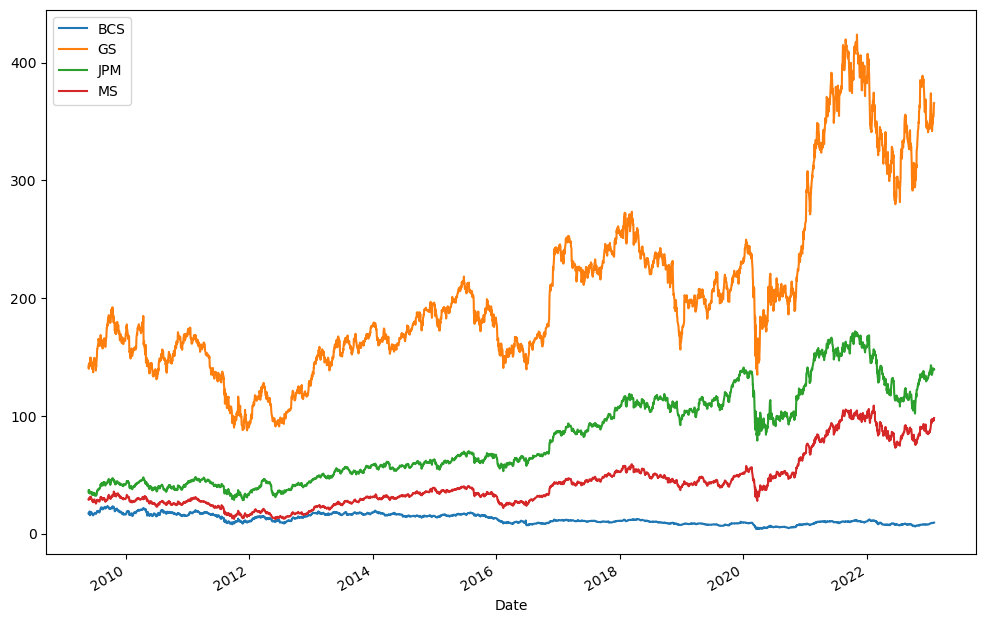

In [9]:
Close. plot(figsize=(12,8))

## Install plotly
https://plotly.com/python/getting-started/

In [10]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = "plotly"


In [11]:
Close.plot()

In [12]:
## plot histogram of percentage changes
Close.pct_change().plot(kind='hist')